# Regress SSTA on Nino3.4 Index

In [1]:
import numpy as np
import sacpy as scp
import matplotlib.pyplot as plt

In [2]:
# load sst
sst = scp.load_sst()['sst']
sst

<xarray.DataArray 'sst' (time: 372, lat: 13, lon: 57)>
[275652 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1991-01-16T12:00:00 ... 2021-12-16T12:00:00
  * lon      (lon) int64 20 25 30 35 40 45 50 55 ... 270 275 280 285 290 295 300
  * lat      (lat) int64 -30 -25 -20 -15 -10 -5 0 5 10 15 20 25 30

In [3]:
# get ssta
ssta = scp.get_anom(sst,method=1)
# ssta[0].plot()

In [4]:
# calculate Nino3.4
Nino34 = ssta.loc[:,-5:5,190:240].mean(axis=(1,2))

In [5]:
linreg = scp.LinReg(Nino34,ssta)

In [6]:
print(linreg)

Linear Regression, x.shape = (372,), y.shape = (372, 13, 57) 


<Figure size 640x480 with 0 Axes>

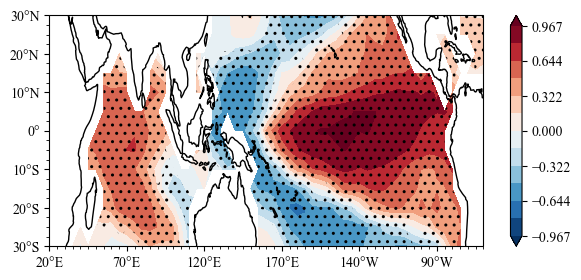

In [7]:
import sacpy.Map
import cartopy.crs as ccrs
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
# linreg.mask()
m = ax.scontourf(lon,lat,linreg.corr)
n = ax.sig_plot(lon,lat,linreg.p_value,color="k",marker="..")
ax.init_map(stepx=50, smally=2.5)
plt.colorbar(m)
# plt.savefig("../pic/nino34.png",dpi=200)

In [8]:
import scipy.stats as sts


def for_loop_reg(nino34, ssta):
    rvalue = np.zeros_like(ssta[0])
    p = np.zeros_like(ssta[0])
    for i in range(rvalue.shape[0]):
        for j in range(rvalue.shape[1]):
            res = sts.linregress(nino34, ssta[:, i, j])
            rvalue[i, j], p[i, j] = res.rvalue, res.pvalue
    return rvalue, p

rvalue, p = for_loop_reg(np.array(Nino34), np.array(ssta))

In [14]:
import sacpy.Map
import cartopy.crs as ccrs
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
m = ax.scontourf(lon,lat,rvalue)
n = ax.sig_plot(lon,lat,p,color="k",marker="..")
ax.init_map(stepx=50, smally=2.5)
plt.colorbar(m)